In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-data-v1/bank_marketing_updated_v1.csv


# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Uploading the data set

In [3]:
df=pd.read_csv('../input/bank-marketing-data-v1/bank_marketing_updated_v1.csv',skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Data cleaning

In [4]:
df.drop('customerid',axis=1,inplace=True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
df['job']=df.jobedu.apply(lambda x: x.split(",")[0])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [6]:
df['Education']=df.jobedu.apply(lambda x: x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
df.drop('jobedu',axis=1,inplace=True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


# Handling the missing values

In [8]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
Education     0
dtype: int64

In [9]:
df.shape


(45211, 19)

In [10]:
df.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [11]:
df=df[~df.age.isnull()]

In [12]:
df.shape

(45191, 19)

In [13]:
df.age.isnull().sum()

0

In [14]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [15]:
df.month=df.month.fillna(df.month.mode()[0])

In [16]:
df.month.isnull().sum()

0

In [17]:
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
Education     0
dtype: int64

In [18]:
df.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [19]:
df.loc[df.pdays<0,'pdays']=np.NaN
df.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [20]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36939
previous         0
poutcome         0
response        30
job              0
Education        0
dtype: int64

In [21]:
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

# Handling the Outliers

<AxesSubplot:ylabel='Frequency'>

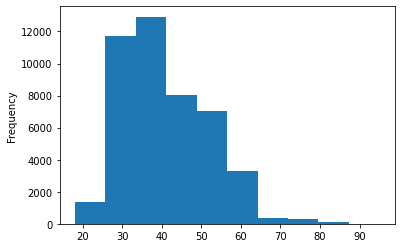

In [22]:
df.age.plot.hist()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

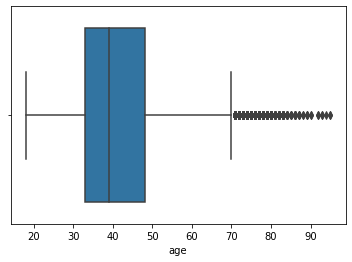

In [23]:
sns.boxplot(df.age)


In [24]:
df.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='balance'>

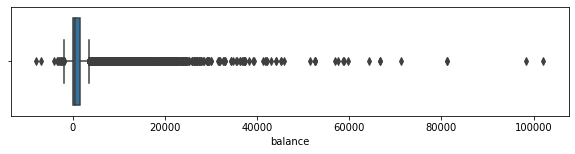

In [25]:
plt.figure(figsize=[10,2])
sns.boxplot(df.balance)

In [26]:
df.balance.quantile([0.5,0.75,0.9,0.95,0.99])

0.50      448.0
0.75     1428.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [27]:
df[df.salary>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,42663.000000,42663.000000,42663.000000,42663.000000,42663.000000,7721.000000,42663.000000
mean,41.206244,60051.777887,1354.264234,15.843635,2.780489,226.231188,0.576987
std,10.502831,30399.248483,3054.206374,8.272009,3.119295,114.770454,2.325736
min,20.000000,16000.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,69.000000,8.000000,1.000000,136.000000,0.000000
50%,39.000000,60000.000000,443.000000,16.000000,2.000000,196.000000,0.000000
75%,49.000000,100000.000000,1412.000000,21.000000,3.000000,329.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,854.000000,275.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary'>

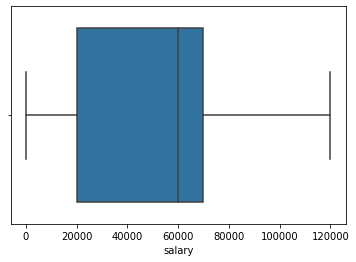

In [28]:
sns.boxplot(df.salary)

# Standardising Values

In [29]:
df.duration.value_counts()

1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: duration, Length: 2646, dtype: int64

In [30]:
df.duration=df.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))


# Univariate Analysis
**Categorical Unordered Univariate Analysis**

In [31]:
df.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [32]:
df.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

<AxesSubplot:>

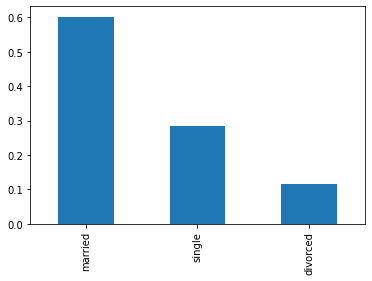

In [33]:
df.marital.value_counts(normalize=True).plot.bar()

In [34]:
df.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

<AxesSubplot:>

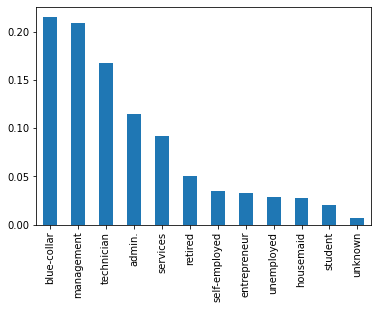

In [35]:
df.job.value_counts(normalize=True).plot.bar()

**Categorical Ordered Univariate Analysis**

In [36]:
df.Education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: Education, dtype: float64

<AxesSubplot:ylabel='Education'>

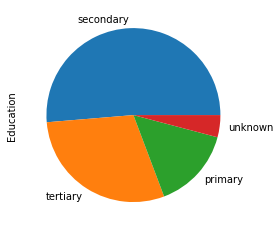

In [37]:
df.Education.value_counts(normalize=True).plot.pie()

<AxesSubplot:>

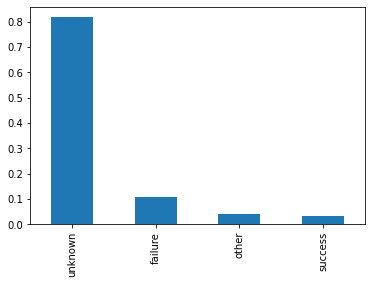

In [38]:
df.poutcome.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

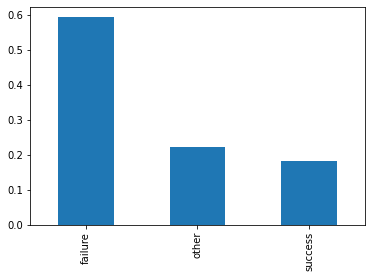

In [39]:
df[~(df.poutcome=='unknown')].poutcome.value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='response'>

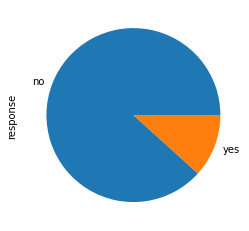

In [40]:
df.response.value_counts().plot.pie()

# Bivariate and Multivariate Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='salary', ylabel='balance'>

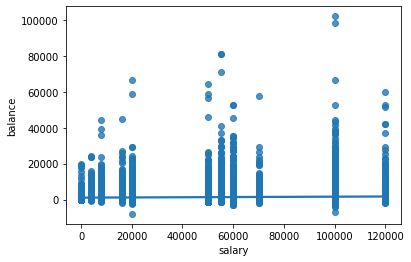

In [41]:
sns.regplot(df.salary,df.balance)

<AxesSubplot:xlabel='age', ylabel='balance'>

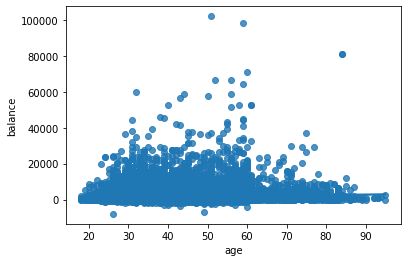

In [42]:
sns.regplot(df.age,df.balance)

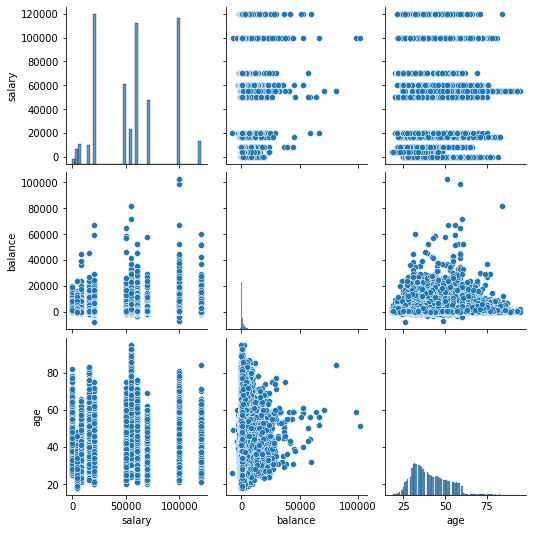

In [43]:
sns.pairplot(df,vars=['salary','balance','age'])

In [44]:
df[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.055505,0.024374
balance,0.055505,1.000000,0.097755
age,0.024374,0.097755,1.000000


<AxesSubplot:>

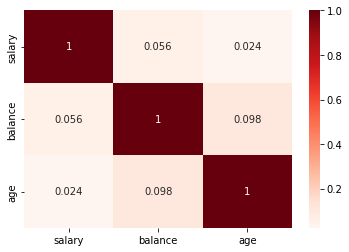

In [45]:
sns.heatmap(df[['salary','balance','age']].corr(),annot=True,cmap='Reds')

In [46]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [47]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='response', ylabel='salary'>

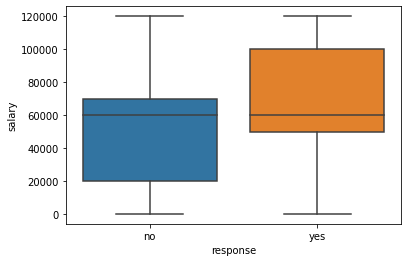

In [48]:
sns.boxplot(data=df,x='response',y='salary')

<AxesSubplot:xlabel='response', ylabel='balance'>

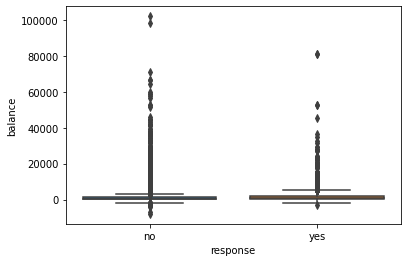

In [49]:
sns.boxplot(data=df,x='response',y='balance')

In [50]:
df.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [51]:
df.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [52]:
def p75(x):
    return np.quantile(x,0.75)

In [53]:
df.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<AxesSubplot:xlabel='response'>

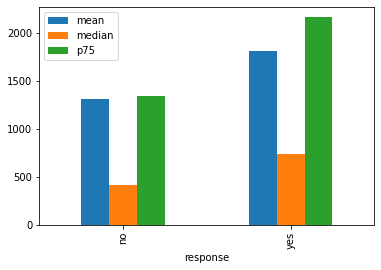

In [54]:
df.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()

In [55]:
df.groupby('Education')['salary'].mean()

Education
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: salary, dtype: float64

<AxesSubplot:xlabel='Education'>

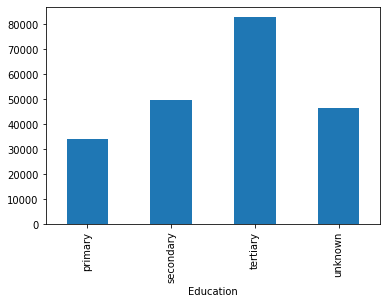

In [56]:
df.groupby('Education')['salary'].mean().plot.bar()

In [57]:
df.groupby('Education')['salary'].median()

Education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='Education'>

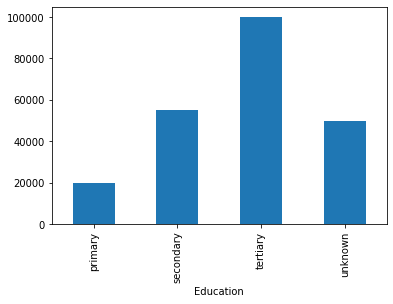

In [58]:
df.groupby('Education')['salary'].median().plot.bar()

<AxesSubplot:xlabel='Education', ylabel='salary'>

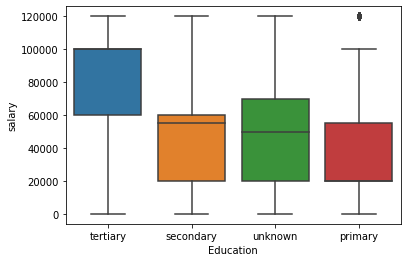

In [59]:
sns.boxplot(x='Education',y='salary',data=df)


<AxesSubplot:xlabel='job'>

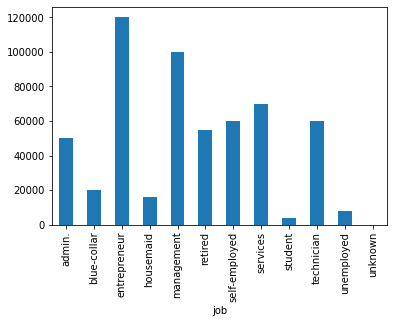

In [60]:
df.groupby('job')['salary'].mean().plot.bar()

In [61]:
df['response_flag']=np.where(df.response=='yes',1,0)

In [62]:
df.response.value_counts()


no     39876
yes     5285
Name: response, dtype: int64

In [63]:
df.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [64]:
df.groupby('Education')['response_flag'].mean()

Education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='Education'>

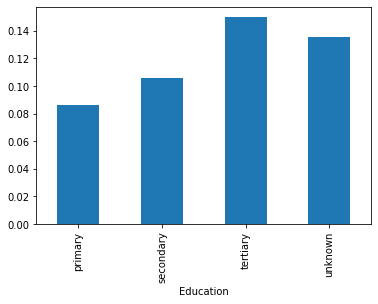

In [65]:
df.groupby('Education')['response_flag'].mean().plot.bar()

In [66]:
df.groupby('job')['response_flag'].mean()

job
admin.           0.121857
blue-collar      0.072787
entrepreneur     0.082828
housemaid        0.087167
management       0.137599
retired          0.227574
self-employed    0.117871
services         0.088873
student          0.286780
technician       0.110614
unemployed       0.155146
unknown          0.118056
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='job'>

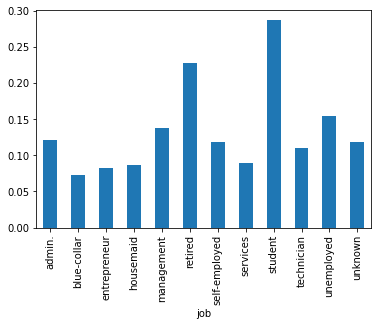

In [67]:
df.groupby('job')['response_flag'].mean().plot.bar()

In [68]:
df.groupby('marital')['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='marital'>

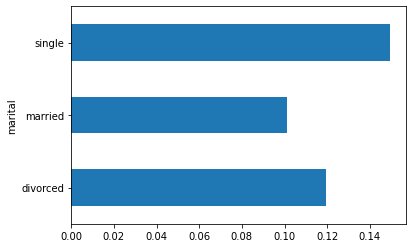

In [69]:
df.groupby('marital')['response_flag'].mean().plot.barh()

<AxesSubplot:xlabel='loan'>

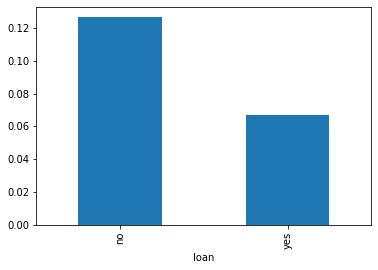

In [70]:
df.groupby('loan')['response_flag'].mean().plot.bar()

<AxesSubplot:xlabel='housing'>

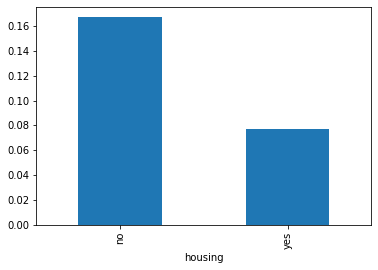

In [71]:
df.groupby('housing')['response_flag'].mean().plot.bar()

<AxesSubplot:xlabel='response', ylabel='age'>

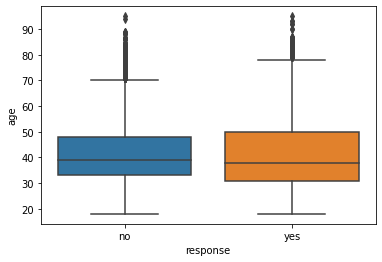

In [72]:
sns.boxplot(data=df,x='response',y='age')

In [73]:
res=pd.pivot_table(data=df,index="Education",columns='marital',values='response_flag')

<AxesSubplot:xlabel='marital', ylabel='Education'>

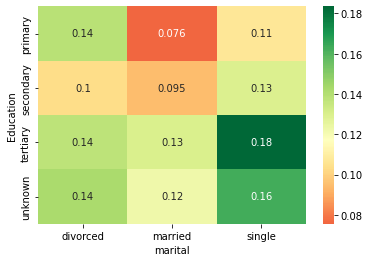

In [74]:
sns.heatmap(res, annot=True, cmap='RdYlGn',center=0.117)

In [75]:
res1=pd.pivot_table(data=df,index="job",columns='marital',values='response_flag')

<AxesSubplot:xlabel='marital', ylabel='job'>

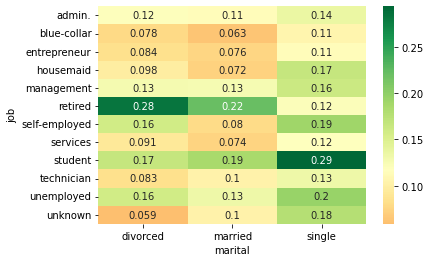

In [76]:
sns.heatmap(res1, annot=True, cmap='RdYlGn',center=0.117)